In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_tn=pd.read_csv("train.csv")
df_tn["source"]="tarin"
df_tst=pd.read_csv("test.csv")
df_tst["source"]="test"
df=df_tn
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,tarin
1,F00000003,209,1,0,1,0,0.0,0,2,1,tarin
2,F00000004,257,1,0,1,0,0.0,0,2,1,tarin
3,F00000005,257,1,1,1,0,0.0,0,2,1,tarin
4,F00000006,342,1,0,1,0,0.0,0,2,1,tarin


In [3]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print(i,len(a))
    if len(a)<5:
        print(a)

ID 88858
Estimated_Insects_Count 71
Crop_Type 2
[1 0]
Soil_Type 2
[0 1]
Pesticide_Use_Category 3
[1 3 2]
Number_Doses_Week 20
Number_Weeks_Used 65
Number_Weeks_Quit 51
Season 3
[1 2 3]
Crop_Damage 3
[0 1 2]
source 1
['tarin']


In [4]:
df.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

In [5]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

In [7]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [8]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

In [9]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

In [10]:
#here we have 1-float,8-int, obj-2

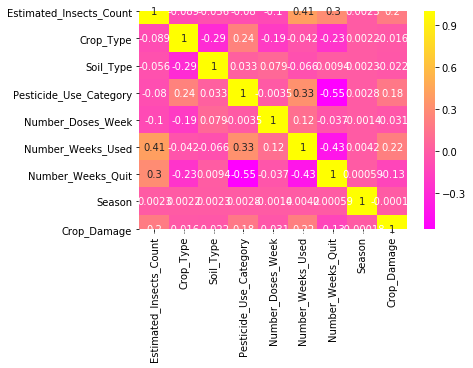

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='spring')

<Figure size 864x360 with 0 Axes>

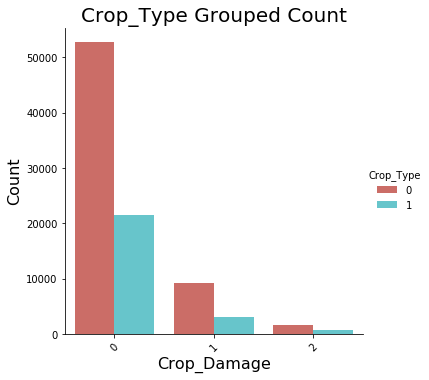

In [12]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

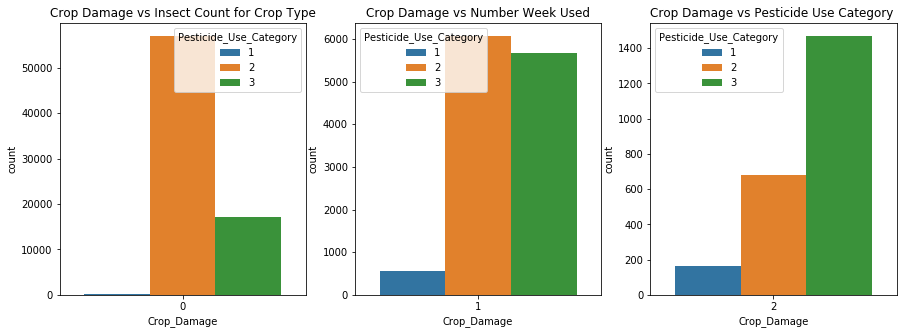

In [13]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage vs Pesticide Use Category ")

<Figure size 864x360 with 0 Axes>

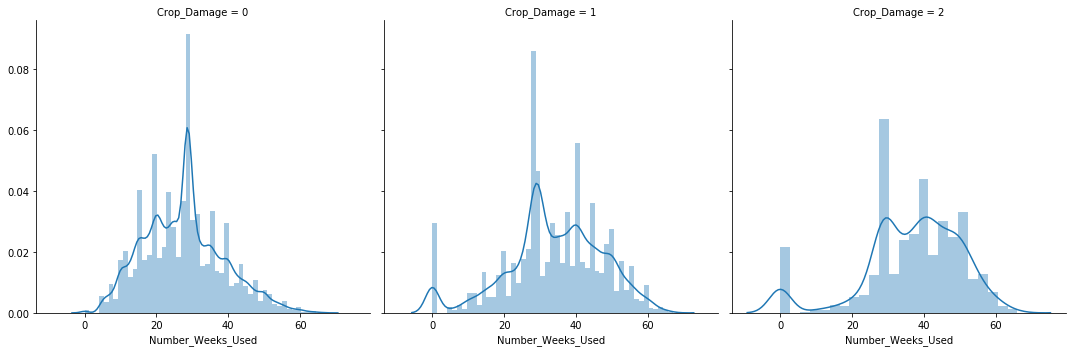

In [14]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

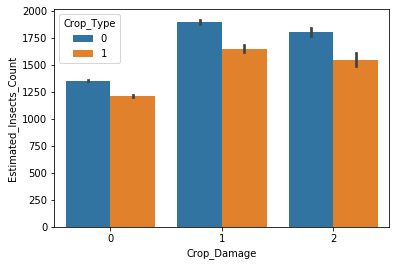

In [15]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

<Figure size 864x360 with 0 Axes>

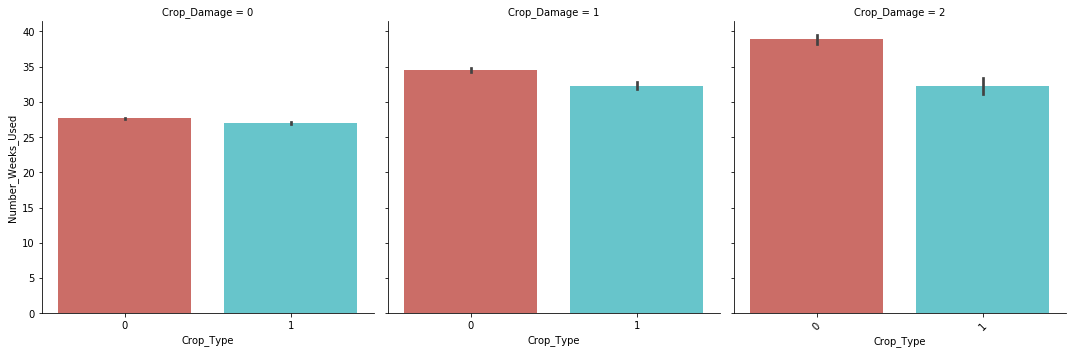

In [16]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

In [17]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [18]:
df.drop(columns=["ID","source"],axis=1,inplace=True)
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

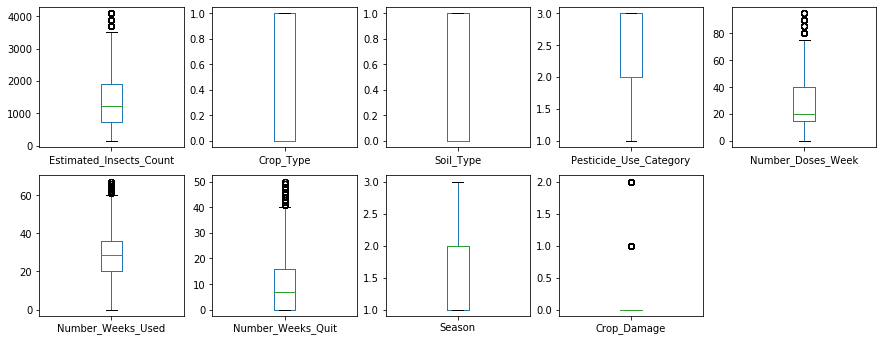

In [19]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [20]:
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

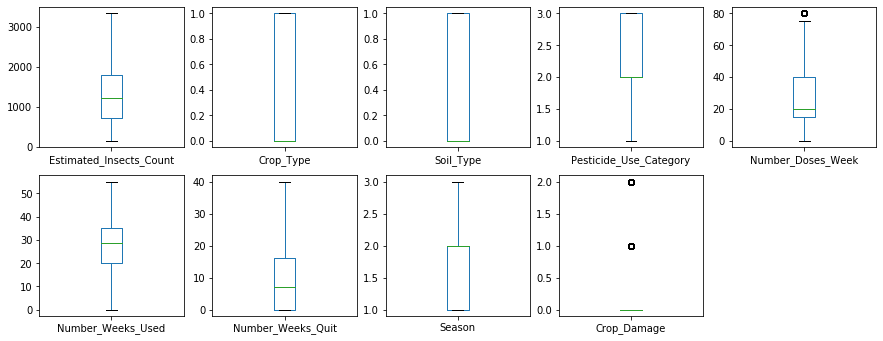

In [21]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE505661C8>,
      dtype=object)

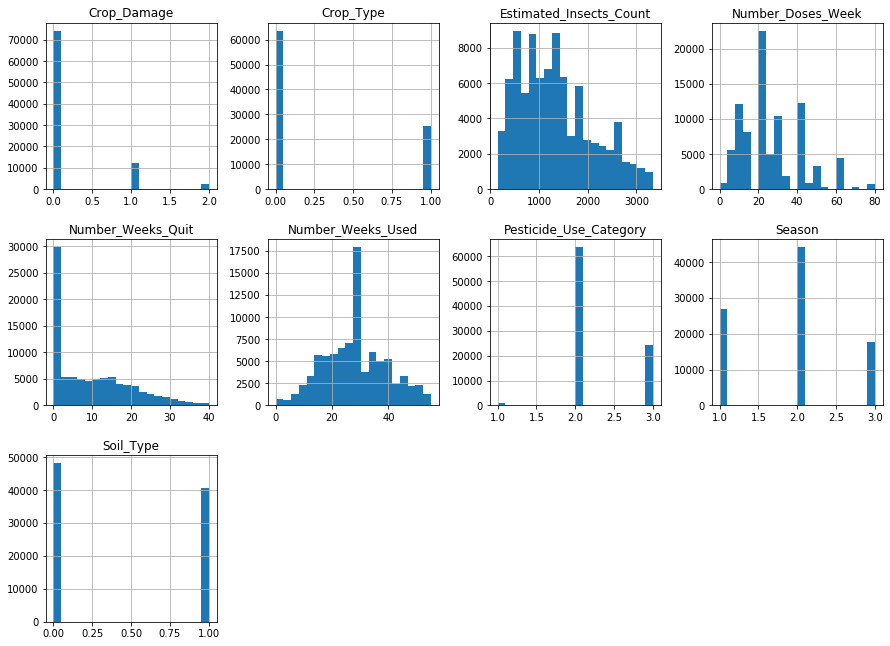

In [22]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)


In [26]:
#Importing libraries
!pip install lightgbm
!pip install xgboost
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [27]:
df_xc=df.drop(columns=['Crop_Damage'])
yc=df[["Crop_Damage"]]

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc = sc.fit_transform(df_xc)
df_xc=pd.DataFrame(xc,columns=df_xc.columns)

In [31]:
#defining a function to find accuracy score, crossvalidation score for the given dataset
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.33,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print('\033[1m',"Results for model : ",names,'\n','\033[0m'
          "max accuracy score is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(" "*100)

In [32]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB',GaussianNB()))


for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)

 Results for model :  Random Forest 
 max accuracy score is 0.8235915973264221 
 Mean accuracy score is :  0.8186544456618602 
 Std deviation score is :  0.001514831780780726 
 Cross validation scores are :   [0.82141451 0.81606932 0.8170718  0.8186269  0.81761396]
                                                                                                    
 Results for model :  KNN 
 max accuracy score is 0.8304119492565817 
 Mean accuracy score is :  0.8264421526962973 
 Std deviation score is :  0.0017533474230391852 
 Cross validation scores are :   [0.82856018 0.82687222 0.82421787 0.82796849 0.82459201]
                                                                                                    
 Results for model :  Decision Tree Classifier 
 max accuracy score is 0.7545696357932069 
 Mean accuracy score is :  0.7478222979054456 
 Std deviation score is :  0.002131274905693013 
 Cross validation scores are :   [0.74962021 0.7439937  0.74701778 0.74586382 0.74845245

In [33]:
kNN=KNeighborsClassifier()
parameters={"n_neighbors":range(2,30)}
clf = GridSearchCV(kNN, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'n_neighbors': 22}

In [34]:
#Again running KNeighborsClassifier with n_neighbor = 22
kNN=KNeighborsClassifier(n_neighbors=22)
max_acc_score("KNeighbors Classifier",kNN,df_xc,yc)

 Results for model :  KNeighbors Classifier 
 max accuracy score is 0.8432001091256309 
 Mean accuracy score is :  0.8420063093047542 
 Std deviation score is :  0.0012515376843345767 
 Cross validation scores are :   [0.84273899 0.84341417 0.84047941 0.84288126 0.84051773]
                                                                                                    


In [35]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
kNN.fit(xc_train,yc_train)
yc_pred=kNN.predict(xc_test)

accuracy score is :  0.8402543326581139
classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     14848
           1       0.48      0.17      0.25      2461
           2       0.33      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.56      0.38      0.39     17772
weighted avg       0.79      0.84      0.80     17772



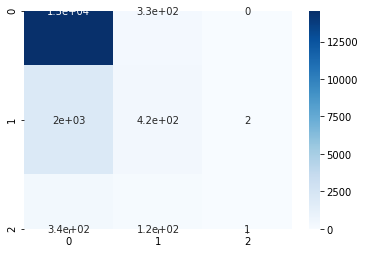

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "Blues")

In [37]:
#Using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10,learning_rate=1)
ad.fit(xc_train,yc_train)
ad_pred=ad.predict(xc_test)
print(accuracy_score(yc_test,ad_pred))
print(confusion_matrix(yc_test,ad_pred))
print(classification_report(yc_test,ad_pred))

0.8400855277965339
[[14830    18     0]
 [ 2361   100     0]
 [  429    34     0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     14848
           1       0.66      0.04      0.08      2461
           2       0.00      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.50      0.35      0.33     17772
weighted avg       0.79      0.84      0.77     17772



In [38]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=992,random_state=42,max_depth= 18,learning_rate=0.4,class_weight= {0: 0.44, 1: 0.4, 2: 0.37},min_data_in_leaf = 55,subsample = 0.7,objective='multiclass',reg_alpha = 1.7,reg_lambda = 1.11,colsample_bytree=0.7)
clf.fit(xc_train, yc_train)

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55


LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.44, 1: 0.4, 2: 0.37},
               colsample_bytree=0.7, importance_type='split', learning_rate=0.4,
               max_depth=18, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=55, min_split_gain=0.0, n_estimators=992,
               n_jobs=-1, num_leaves=31, objective='multiclass',
               random_state=42, reg_alpha=1.7, reg_lambda=1.11, silent='warn',
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [39]:
lg_pred=clf.predict(xc_test)
print(accuracy_score(yc_test,lg_pred))
print(confusion_matrix(yc_test,lg_pred))
print(classification_report(yc_test,lg_pred))

0.8465563808237677
[[14566   282     0]
 [ 1983   478     0]
 [  318   144     1]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14848
           1       0.53      0.19      0.28      2461
           2       1.00      0.00      0.00       463

    accuracy                           0.85     17772
   macro avg       0.80      0.39      0.40     17772
weighted avg       0.82      0.85      0.81     17772

